In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import random

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
nasData = pd.read_csv("NAS.csv")
nasData = nasData.dropna(axis="rows")

In [3]:
nasData.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [4]:
#resets the indexing in the dataframe
nasData = nasData.reset_index(drop=True)

In [5]:
# Converts dates from strings to integers by mapping each date to an integer
dato = nasData['Date']
dato = pd.to_datetime(dato)
dato = dato.map(dt.datetime.toordinal)
dato = dato.to_frame()

In [6]:
#Function for mapping a specific date to an integer
def convertDate(string):
    date = pd.to_datetime(string)
    return dt.datetime.toordinal(date)

# function to randomize a date
def randomDate(start, stopp):
    time_between_dates = stopp - start
    days_between_dates = time_between_dates.days
    random_number_of_days = random.randrange(days_between_dates)
    random_date = start + dt.timedelta(days=random_number_of_days)
    return random_date

In [7]:
# training data
inputData = dato
closingPrice = nasData['Adj Close']
X_train, X_test, y_train, y_test = train_test_split(inputData, closingPrice, test_size=0.3, random_state=0)

# Linear regression

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

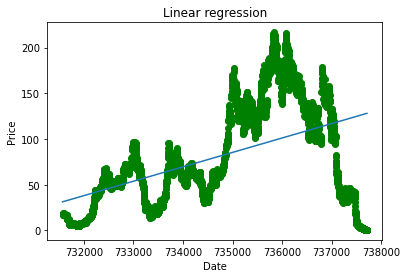

In [9]:
plt.title('Linear regression')
plt.xlabel('Date')
plt.ylabel('Price')
plt.scatter(dato,closingPrice, color = 'green')
plt.plot(dato, model.predict(dato))
plt.show()

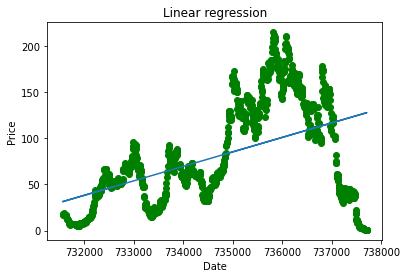

In [10]:
plt.title('Linear regression')
plt.xlabel('Date')
plt.ylabel('Price')
plt.scatter(X_test,y_test, color = 'green')
plt.plot(X_test, model.predict(X_test))
plt.show()

In [23]:
ranDate = randomDate(dt.date(2021,1,1),dt.date(2021,12,30))
dag = convertDate(ranDate)
print(f"At day {ranDate} Linear regression predicts: {model.predict([[dag]])}")

At day 2021-08-07 Linear regression predicts: [132.76295131]


# Polynomial regression 1
It seems that It would'nt go higher than 3.th degree, even though i have set to 5.th

In [34]:
degree = 5
poly_reg = PolynomialFeatures(degree)
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

LinearRegression()

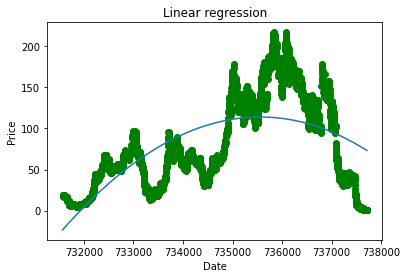

In [35]:
#The figure has the predicted value following a 3.th degree curve
plt.figure()
plt.title('Linear regression')
plt.xlabel('Date')
plt.ylabel('Price')
plt.scatter(dato, closingPrice, color = 'green')
plt.plot(dato, pol_reg.predict(poly_reg.fit_transform(dato)))
plt.show()

In [42]:
print(f"At day {ranDate} Polynomial regression predicts: {pol_reg.predict(poly_reg.fit_transform([[dag]]))}")

At day 2021-08-07 Polynomial regression predicts: [61.21309586]


# Interpolation
With interpolation I can push the degree one degree higer, even thoudh I use 9.th degree it is still plotting 4.th degree

/Users/Awesome/anaconda3/envs/dave3625/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


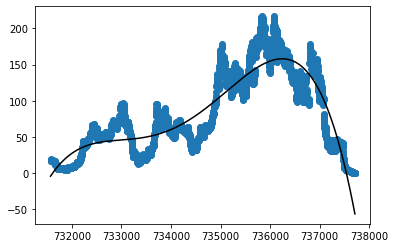

In [44]:
degree = 9
coefs = np.polyfit(dato.values.flatten(), closingPrice.values.flatten(), degree)
plt.figure()
plt.plot(dato, np.polyval(coefs, dato), color="black")
#plt.title("Polyfit degree "+str(degree))
plt.scatter(dato,closingPrice)
plt.show()